# CS Project


In [4]:
!pip install plotly==5.1.0
!pip install -U kaleido
!pip install nbformat
!pip install --upgrade nbformat

In [5]:
import plotly as py
import pandas as pd
import plotly.express as px
import json
import numpy
import kaleido
import os
import glob
import matplotlib.pyplot as plt


In [7]:
INDIA_STATE_GEOMETRY_PATH = "Mapfile\states_india.geojson"
INDIA_STATE_KEYS_PATH = "Mapfile\mapping_key.csv"
DISEASE_RISK_PATH = "Disease_csv"
DISEASE_PATH = ''
MAP_PATH = 'maps'

In [8]:
def mapping_key_generator():
    df = pd.read_csv("Diseases\AH.csv") #

    india_states = json.load(open('Mapfile\states_india.geojson', 'r'))

    cid = pd.DataFrame(df[['state_mapper','Location']])

    cid.to_csv('Mapfile\mapping_key.csv')

In [9]:
def utility2(india_states):
  state_id_map = {}
  for feature in india_states['features']:
    feature['id'] = feature['properties']['state_code']
    state_id_map[feature['properties']['st_nm']] = feature['id']
  return india_states

In [10]:
def map_key_adder(csv_to_concat,csv_to_concat_with): 
    #ld = pd.read_csv('Lead.csv')
    MAP_PRINT = pd.merge(csv_to_concat_with,csv_to_concat)
    return MAP_PRINT

In [11]:
def variance_col_adder(a,df_name):
    a = pd.read_csv("Child Underweight.csv")
    variance = a.var()['Value']
    Variance = a['Value'] - a['Value']*variance
    a['Variance'] = Variance
    a.to_csv(file=os.path.join('norm_risk',f'{df_name}.csv'))
    return a
    
    

#PLOT MAP


In [ ]:
def map_plot(map_csv,geo_json, map_write_path,names):
    map_csv['id'] = map_csv['state_mapper']
    fig = px.choropleth(map_csv, locations ='id', geojson = geo_json, color = 'Value')
    fig.update_geos(fitbounds = 'locations', visible= False)
    fig.update_layout(
    title_text = names
     # limite map scope to USA
)
    # fig.show()
    fig.write_image(file=os.path.join('maps',f'{names}.png'), format='png')

In [12]:
def get_all_csv(specific_path):
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path,specific_path,"*.csv"))
    return csv_files

In [ ]:
CSV_FILES = get_all_csv(DISEASE_RISK_PATH)
cid = pd.read_csv(INDIA_STATE_KEYS_PATH)

india_states = json.load(open('Mapfile\states_india.geojson', 'r'))
india_states = utility2(india_states)
for f in CSV_FILES:
    print(f)
    df = pd.read_csv(f)
    map_print = map_key_adder(df,cid)
    splitf = f.split('\\')
    print(splitf[-1].split('.')[0])
    map_plot(map_print,india_states , MAP_PATH,splitf[-1].split('.')[0])
    

#PLOT LINE

    Unnamed: 0                    Location  Year       Age   Sex  \
0            0  Jammu & Kashmir and Ladakh  2019  All ages  Both   
1            1           Arunachal Pradesh  2019  All ages  Both   
2            2                 Uttarakhand  2019  All ages  Both   
3            3            Himachal Pradesh  2019  All ages  Both   
4            4     Other Union Territories  2019  All ages  Both   
5            5              Andhra Pradesh  2019  All ages  Both   
6            6                       Assam  2019  All ages  Both   
7            7                       Delhi  2019  All ages  Both   
8            8                         Goa  2019  All ages  Both   
9            9                     Haryana  2019  All ages  Both   
10          10                   Karnataka  2019  All ages  Both   
11          11                      Kerala  2019  All ages  Both   
12          12                 Maharashtra  2019  All ages  Both   
13          13                     Manipur  2019

C:\Users\saama\AppData\Local\Temp\ipykernel_19736\3207979175.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variance']=(df['Value']-df.mean()['Value'])/df.std()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_19736\3207979175.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variance']=(df['Value']-df.mean()['Value'])/df.std()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_19736\3207979175.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variance']=(

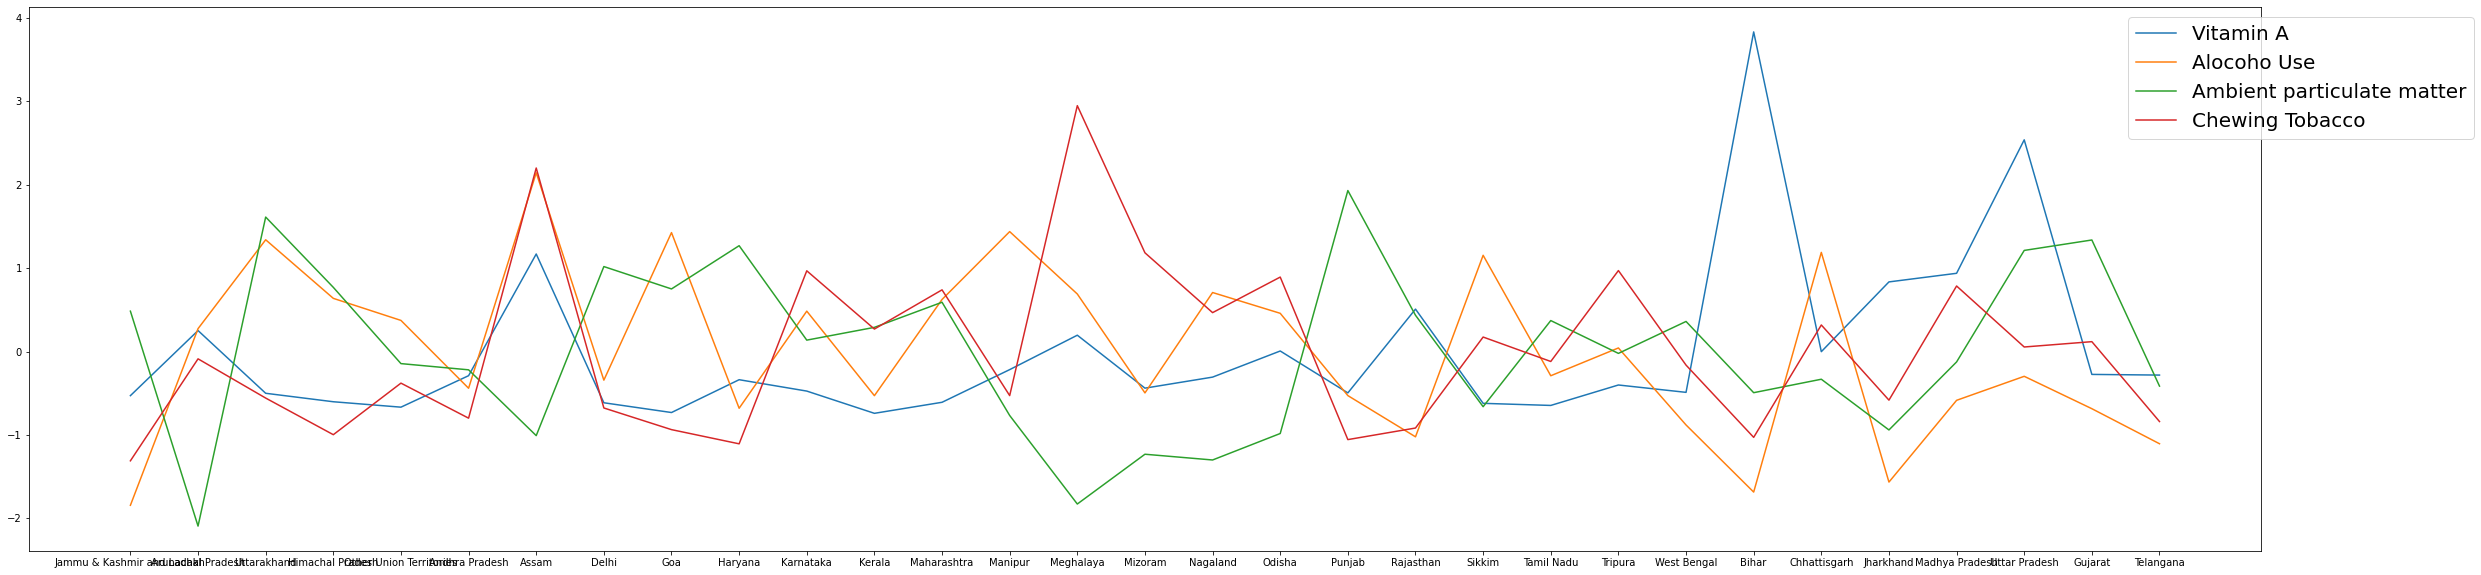

In [13]:
CSV_FILES = get_all_csv(DISEASE_RISK_PATH)
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
#print(csv_file)
f = plt.figure()
#plt.autoscale()
for i in range(len(csv_file)-47):
    x = pd.read_csv(csv_file[i-1])
    df = pd.DataFrame(x)
    print(df)
    df['Value'].dropna()
    print(df)
    df['variance']=(df['Value']-df.mean()['Value'])/df.std()['Value']
    #variance = df.var()['Value']
    #Variance = df['Value'] - variance 
    '''df['Value']*'''
    #df['variance'] = Variance
    splitf = csv_file[i-1].split(os.path.sep)
    
    #plt.legend(splitf[-1].split('.')[0])
    plt.plot(df['Location'].tolist(), df['variance'].tolist(), label = splitf[-1].split('.')[0])
    #art.Artist.set_label(csv_file)
    
    f.set_figwidth(40)
    f.set_figheight(10)
plt.legend(loc='best', bbox_to_anchor=(.1, 0, 1, 1),fontsize = 20)


['f:\\Code\\CS project Health\\Health\\Disease_csv\\Alocoho Use.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Ambient particulate matter.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Chewing Tobacco.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Child Stunting.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Child Underweight.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\child wasting.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Discontinued breastfeeding.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Drug Use.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\Handwashing.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\High Blood pressure.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\High BMI.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\High fasting plasma glucose.csv', 'f:\\Code\\CS project Health\\Health\\Disease_csv\\High LDL.csv', 'f:\\Code\\CS project Health\\Health\\Dise

C:\Users\saama\AppData\Local\Temp\ipykernel_22280\4264107283.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_22280\4264107283.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_22280\4264107283.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()['Value']
C:\Users\saama\AppData\Local\Temp\ipykernel_22280\4264107283.py:

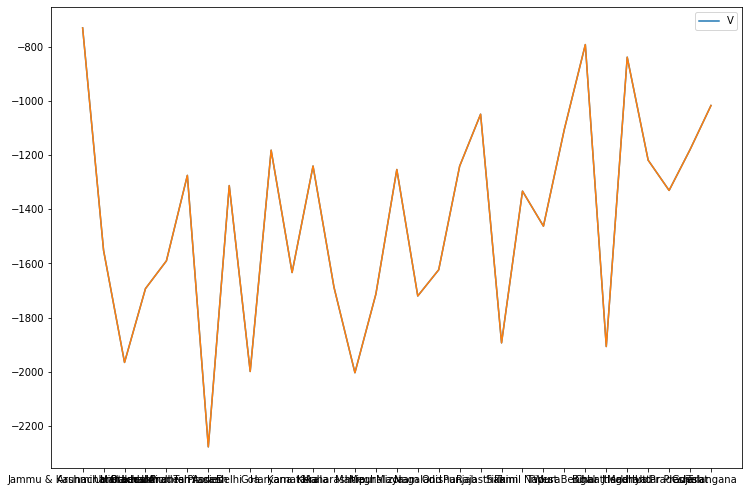

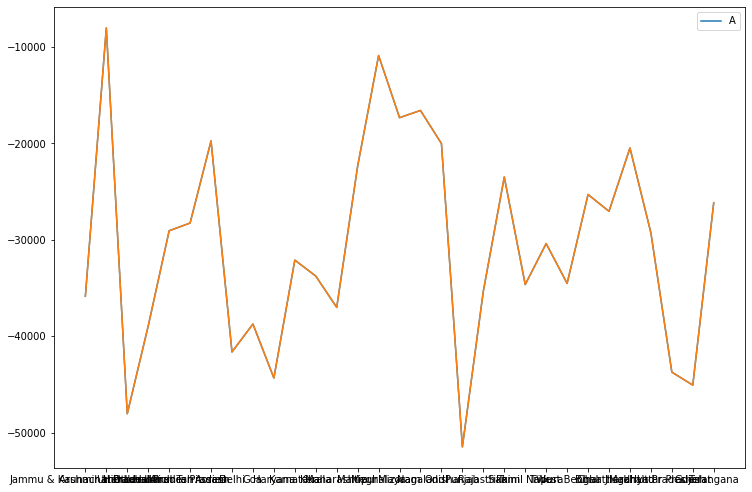

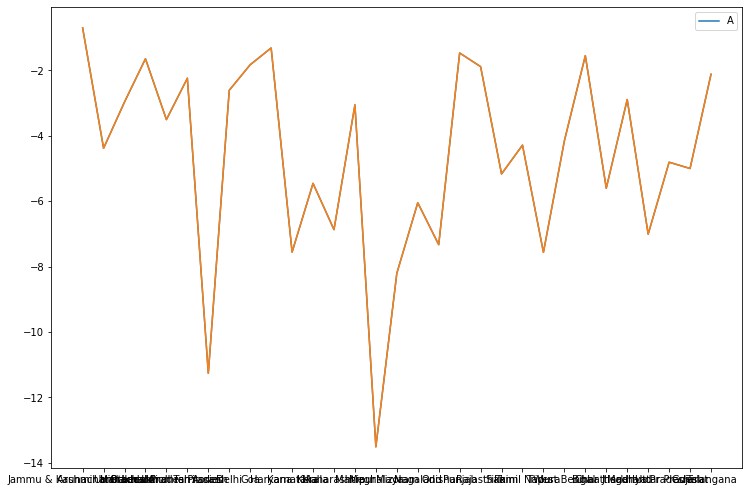

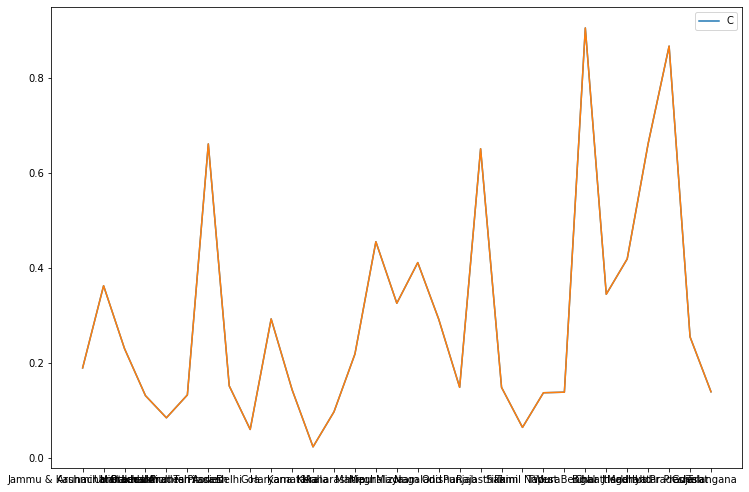

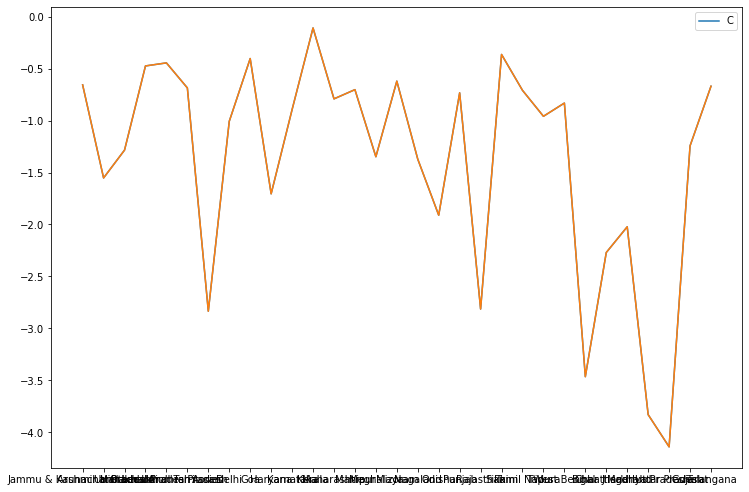

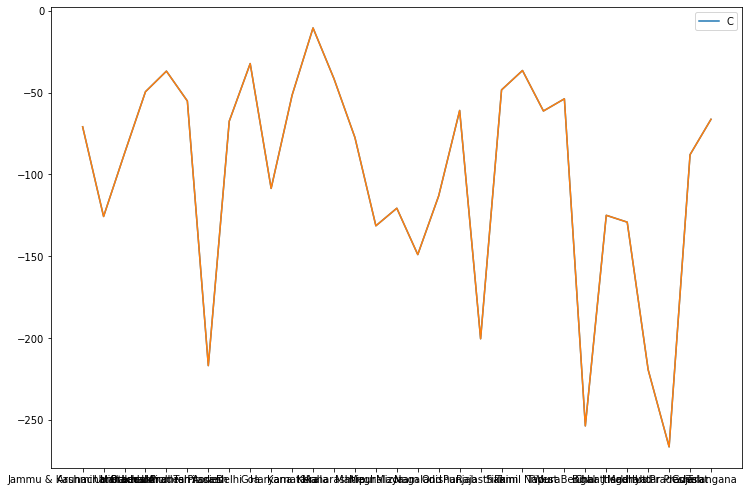

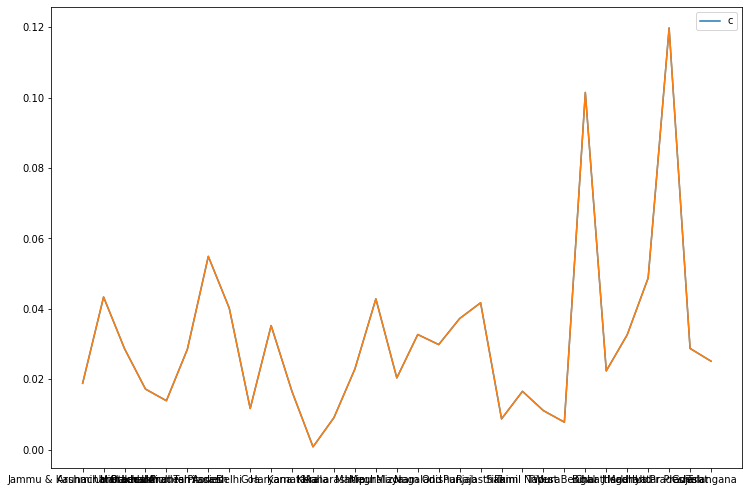

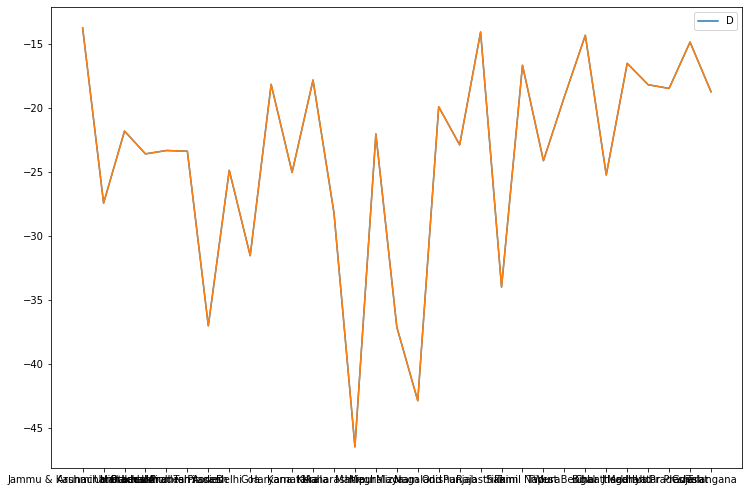

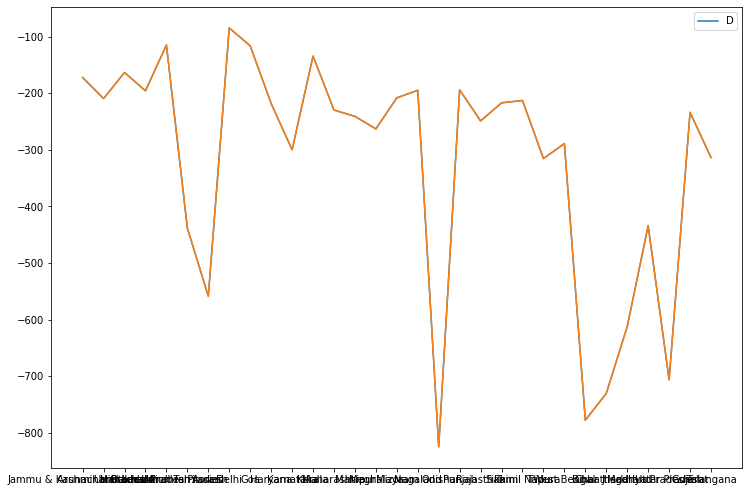

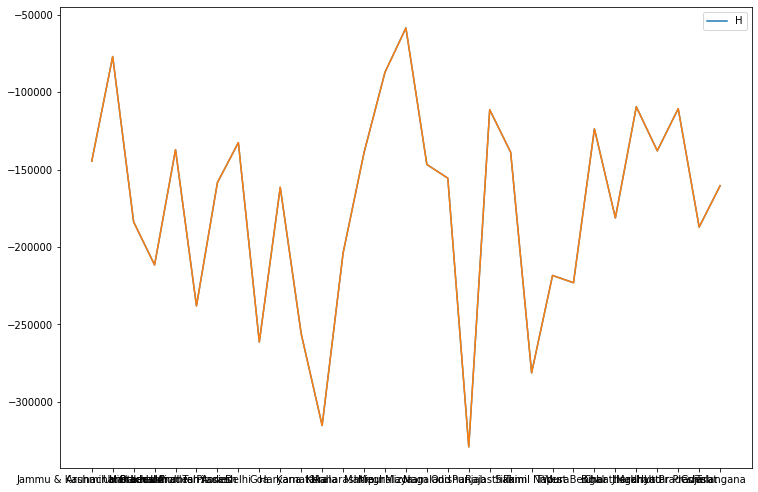

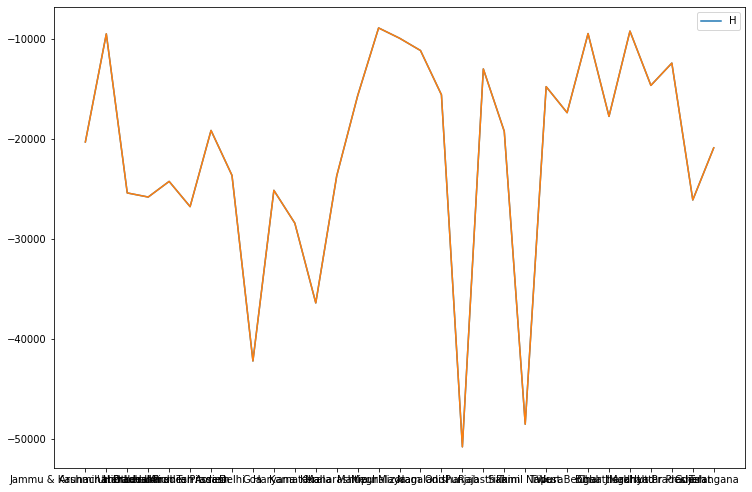

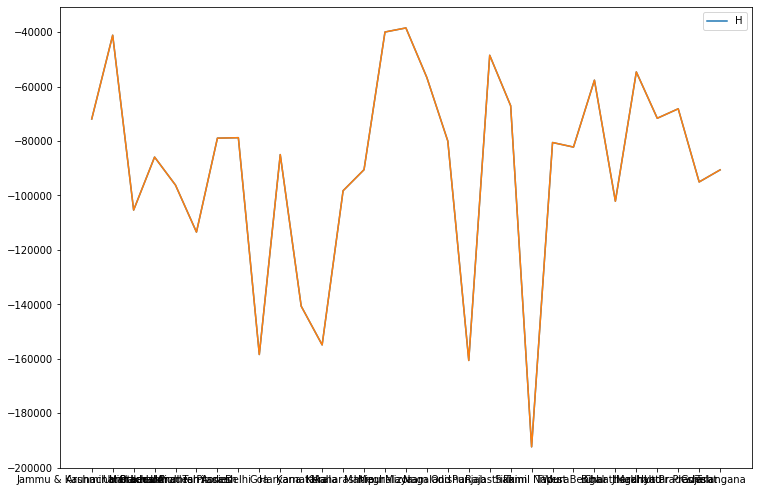

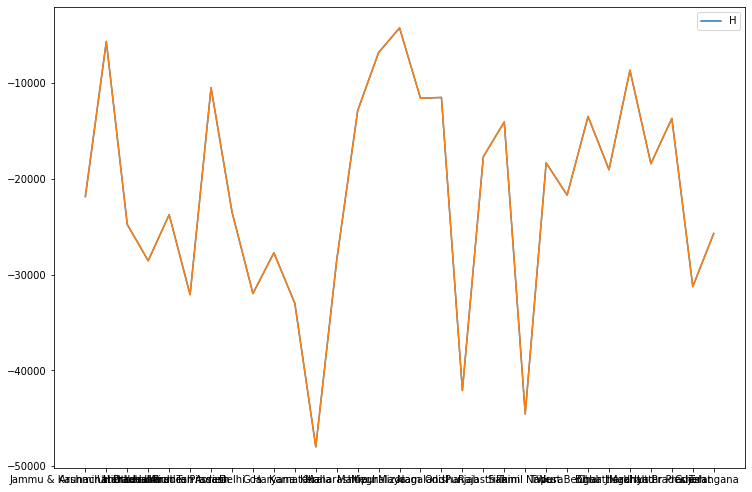

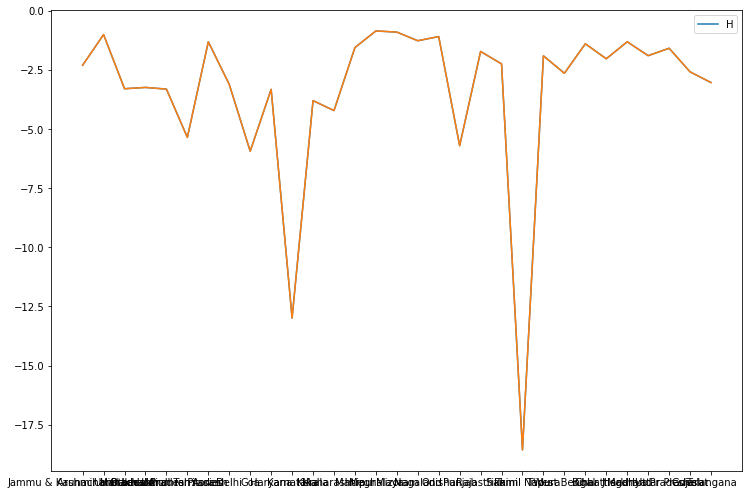

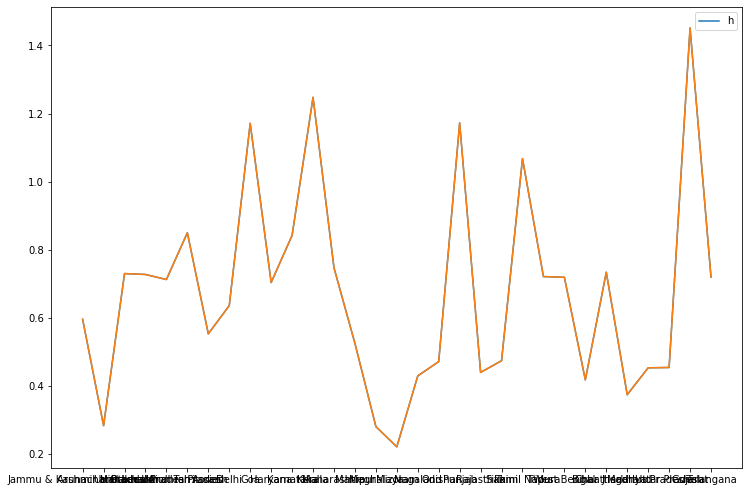

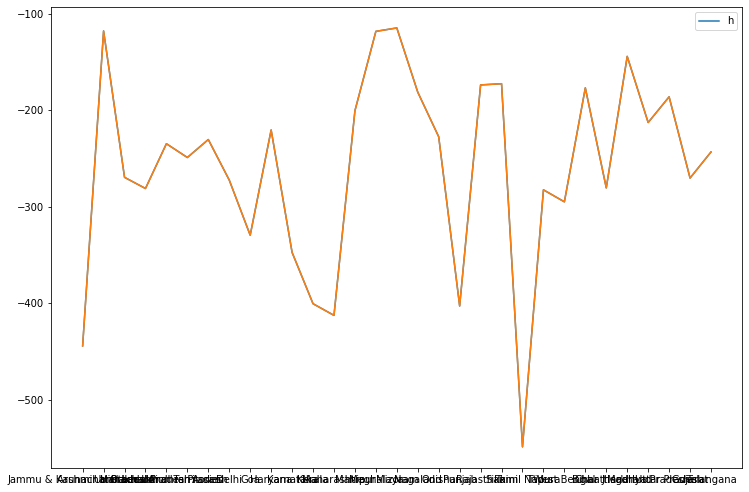

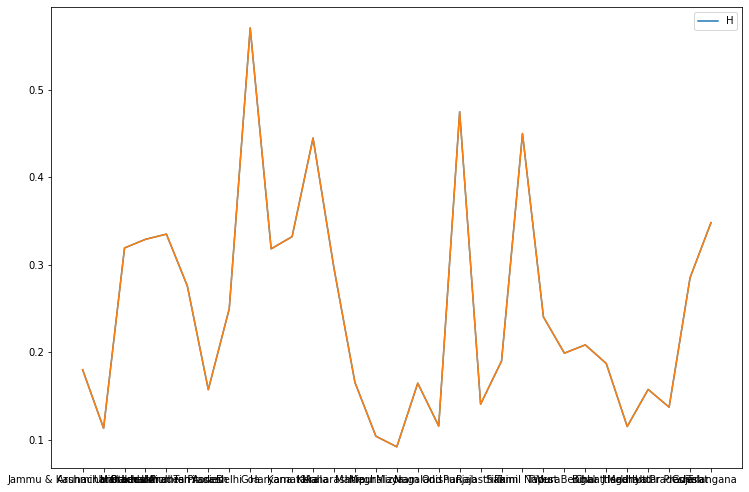

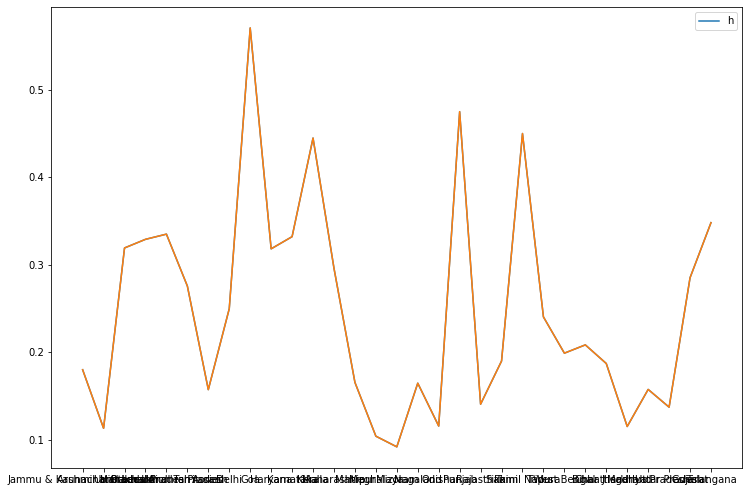

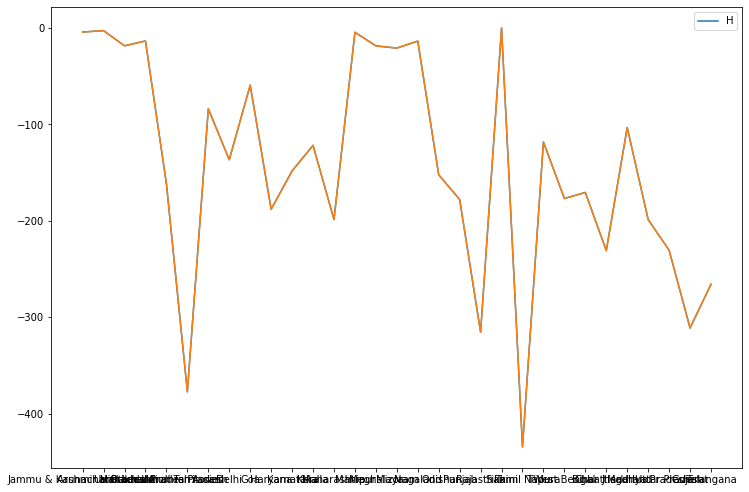

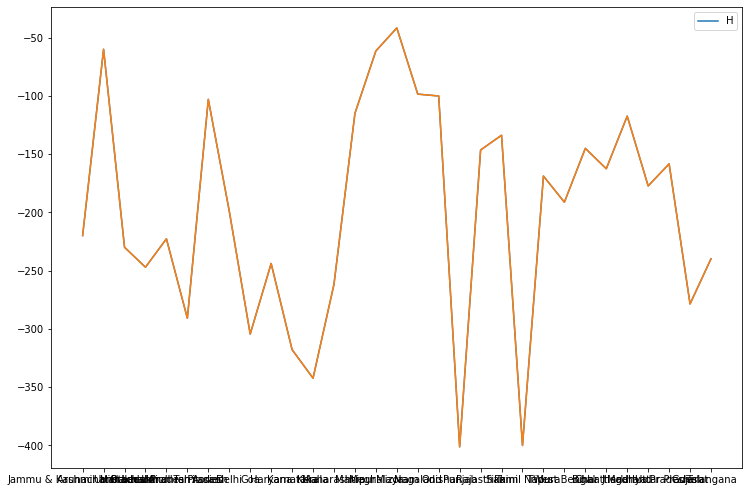

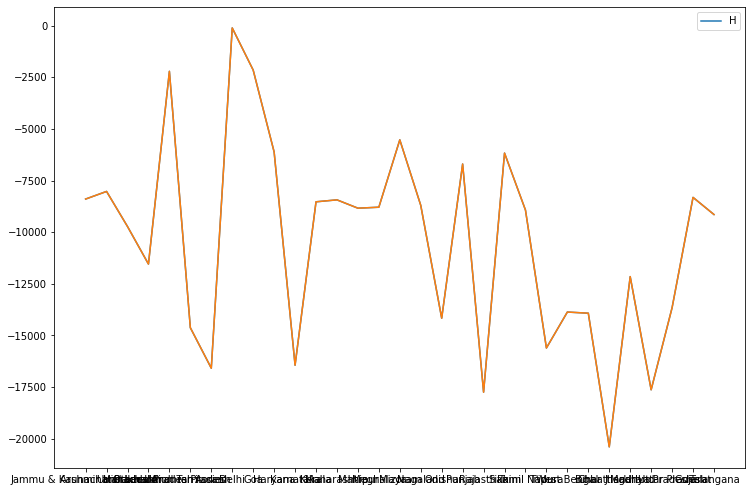

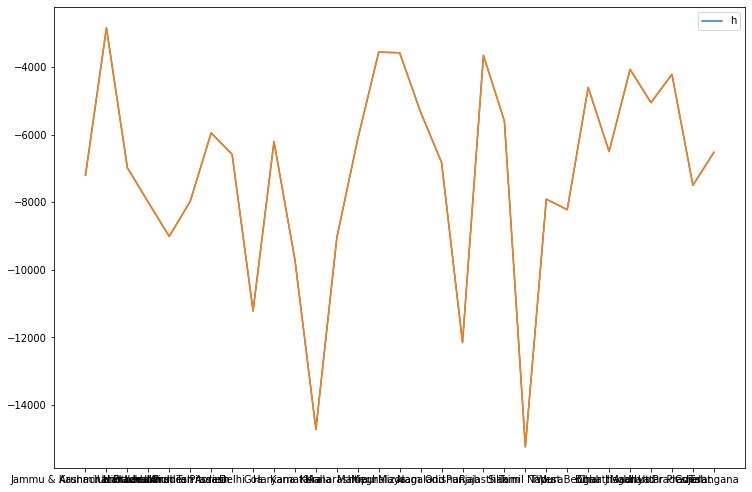

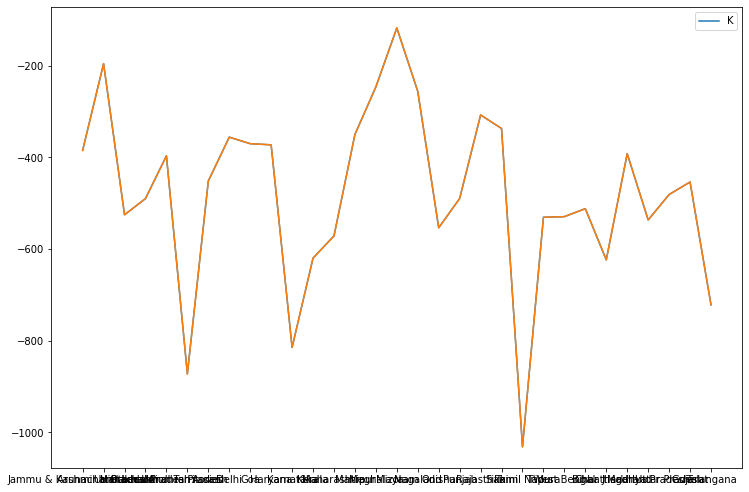

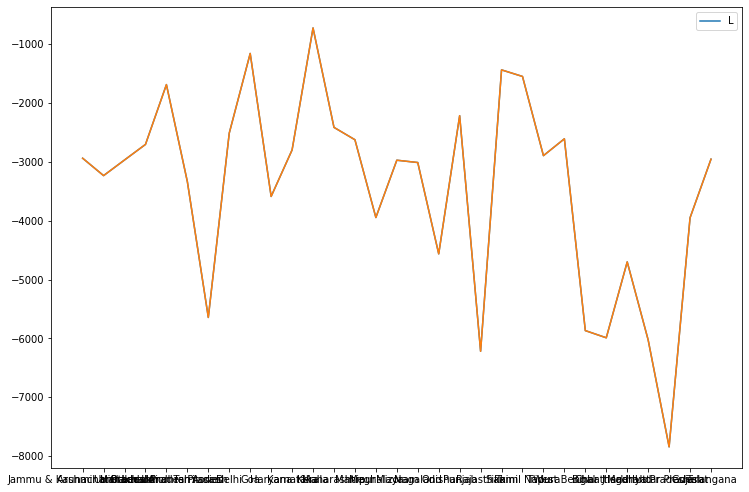

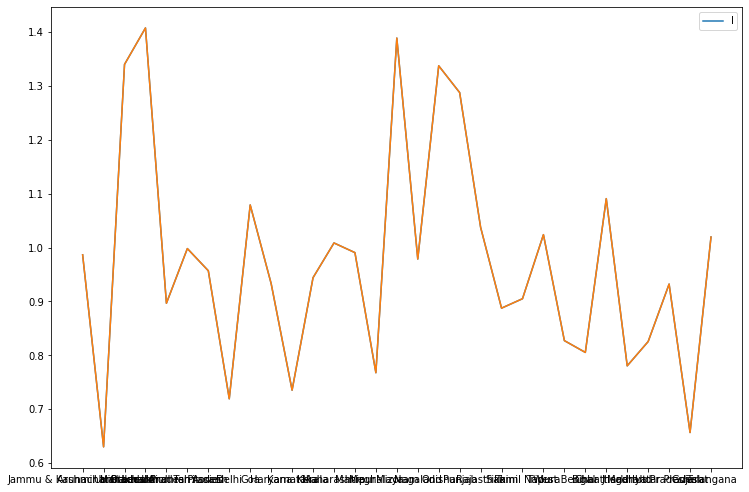

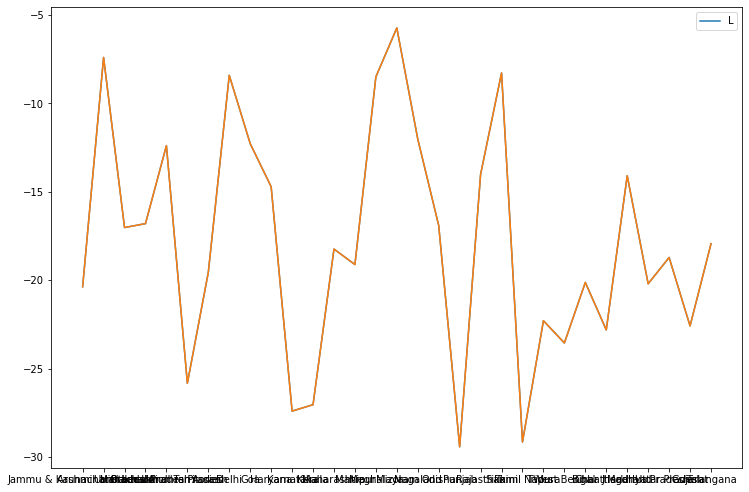

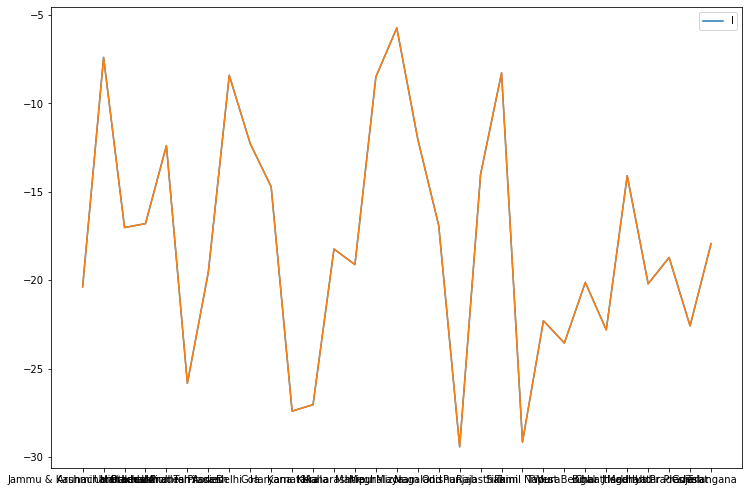

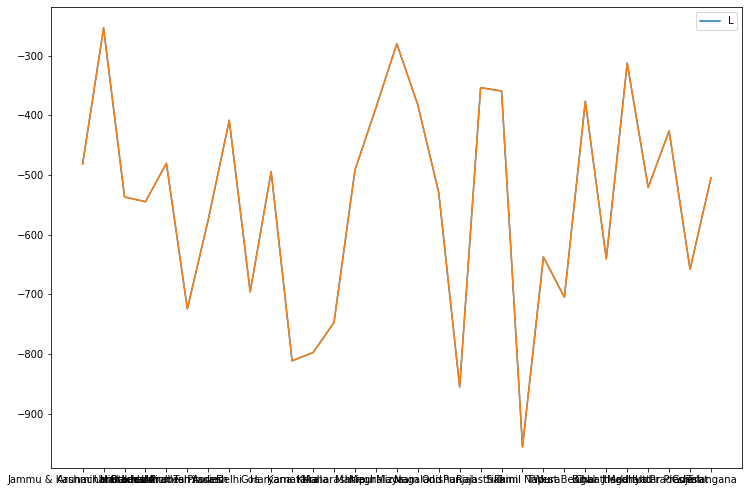

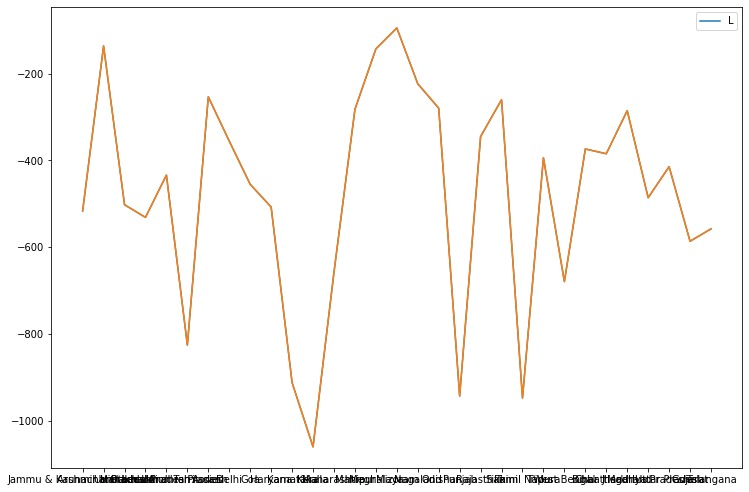

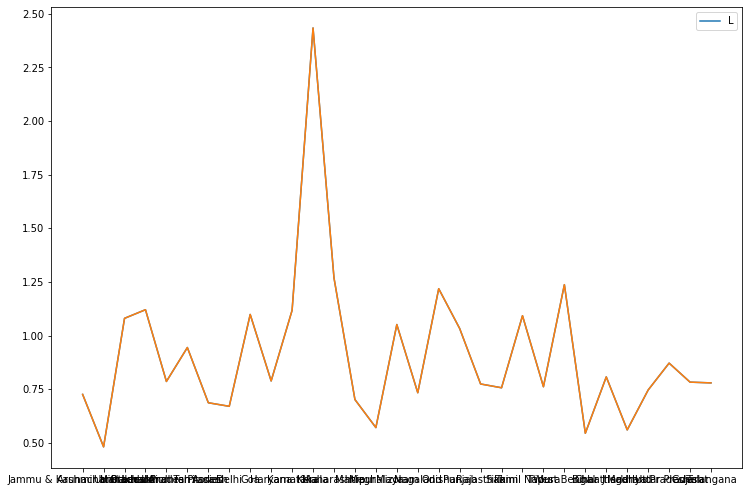

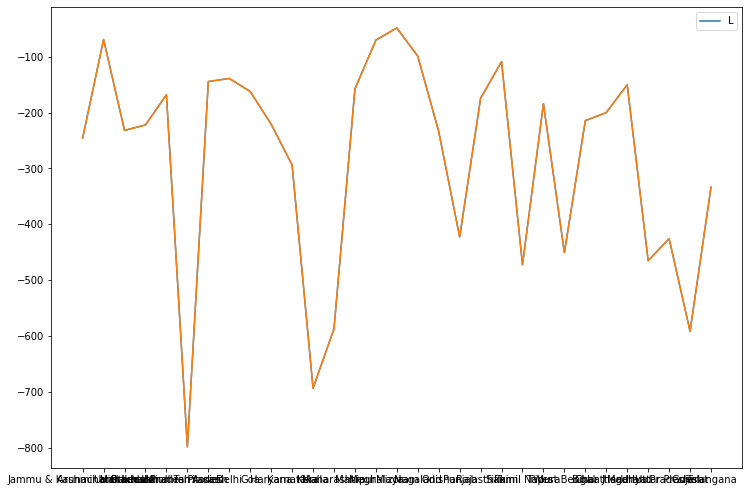

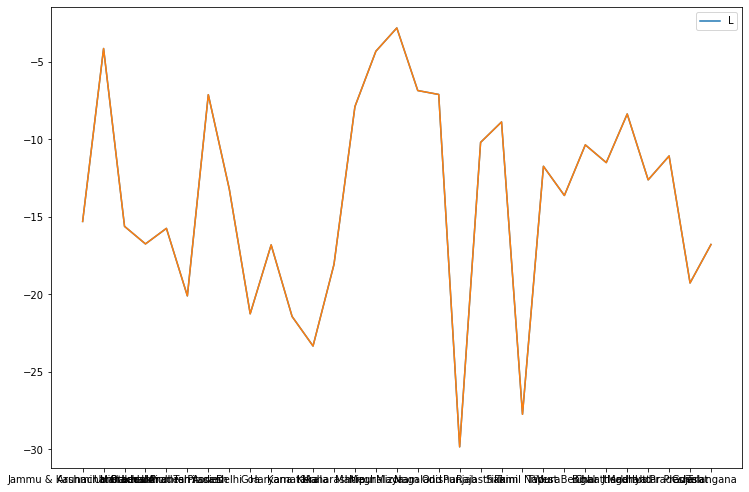

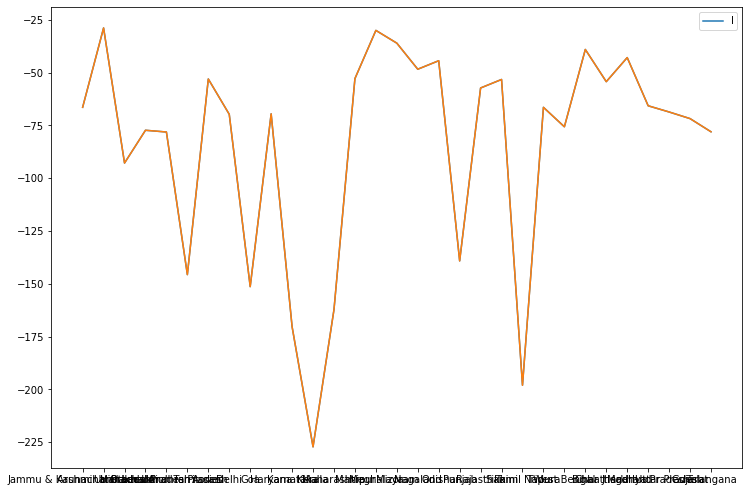

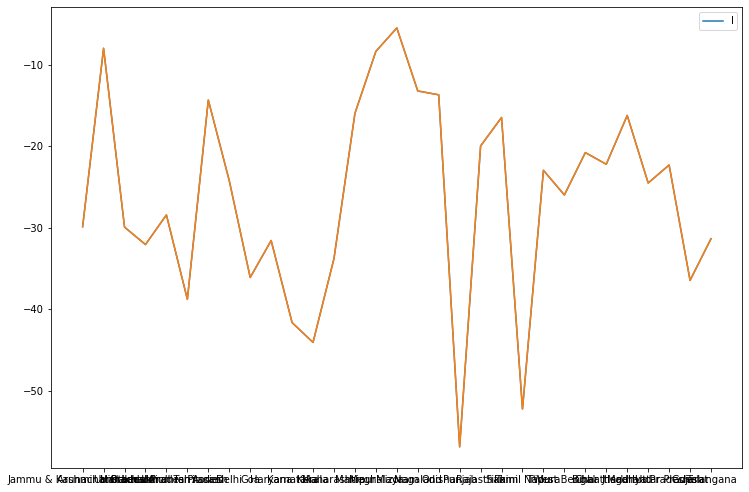

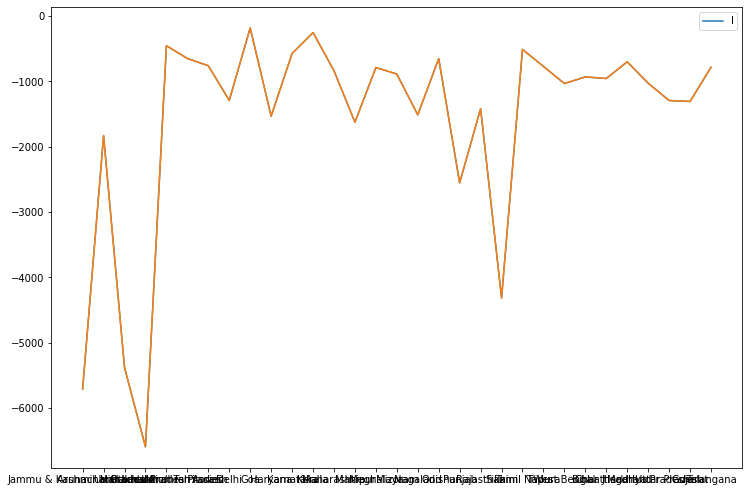

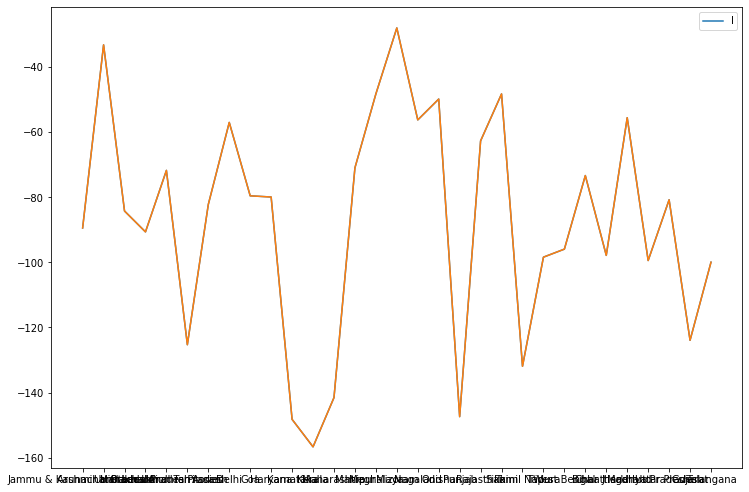

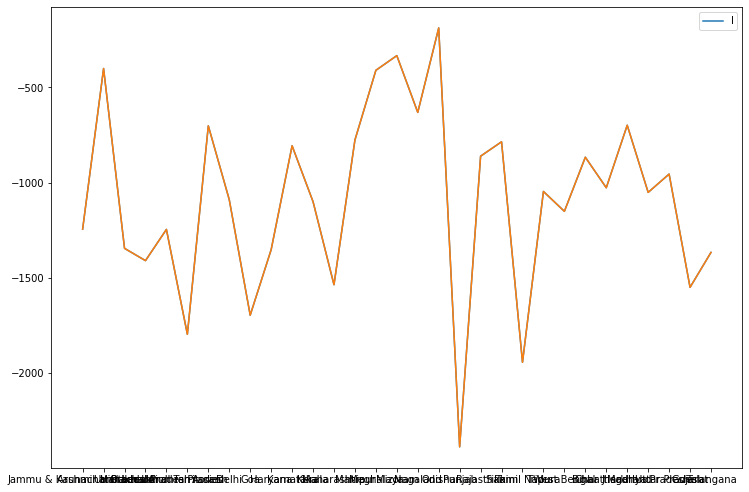

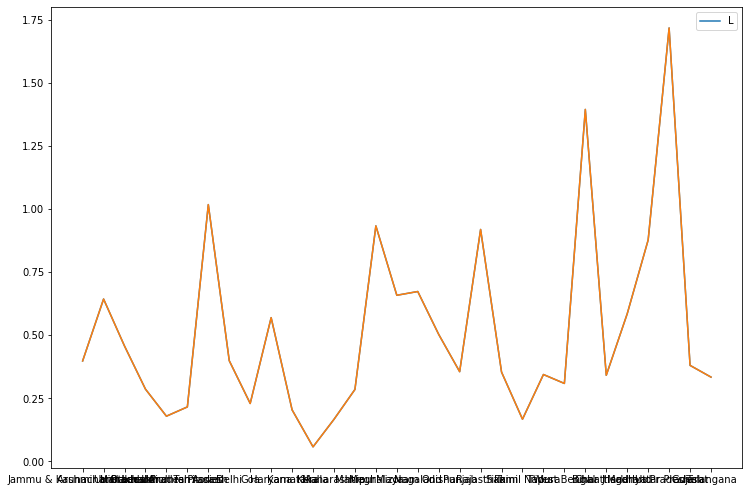

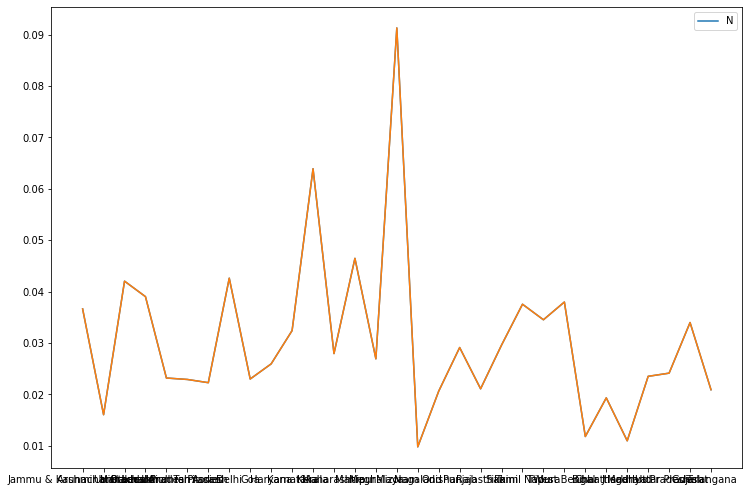

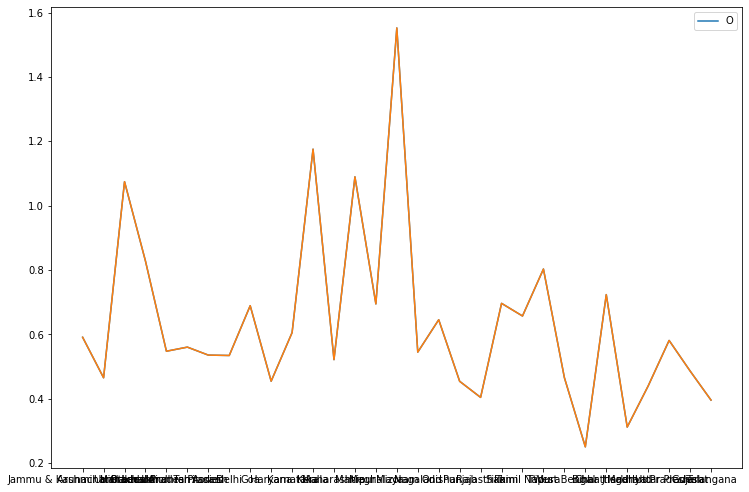

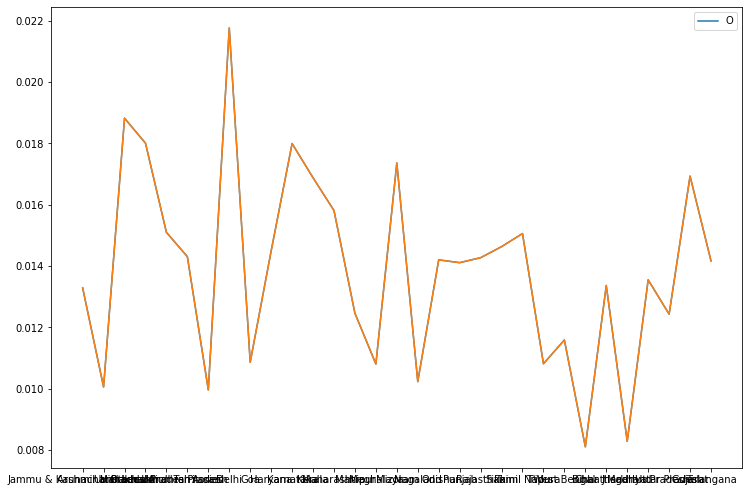

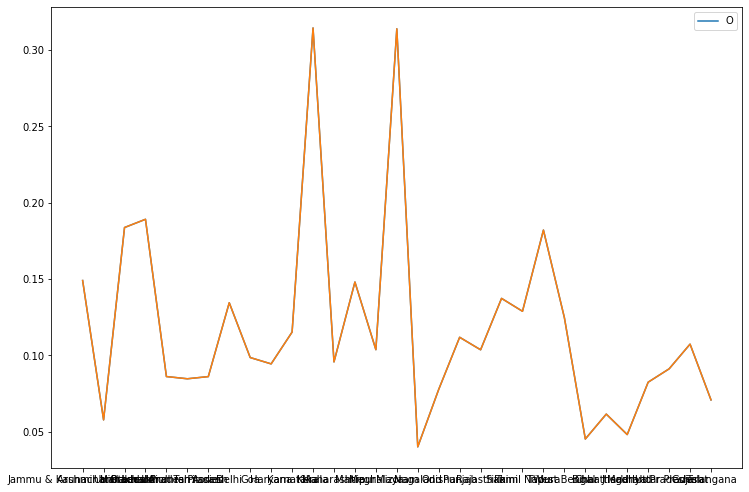

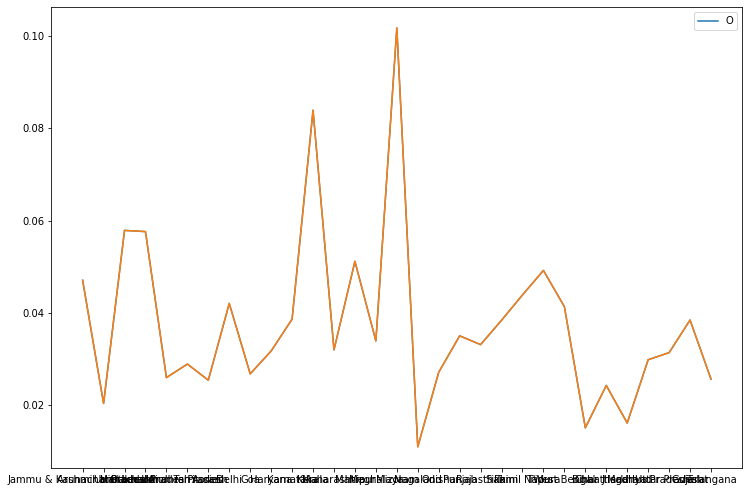

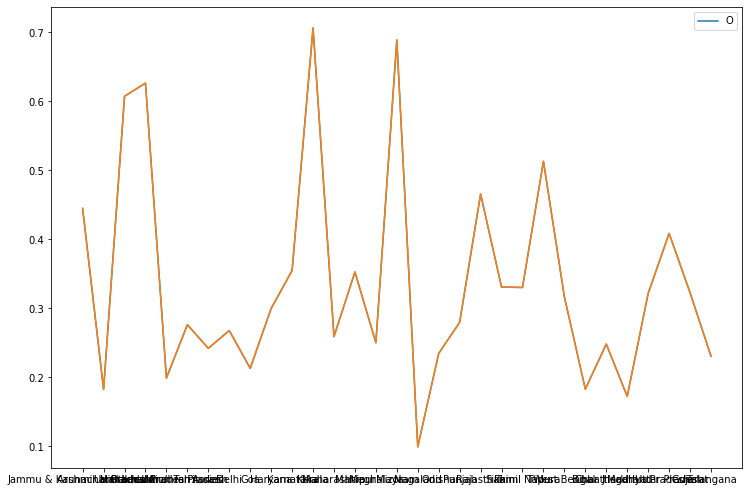

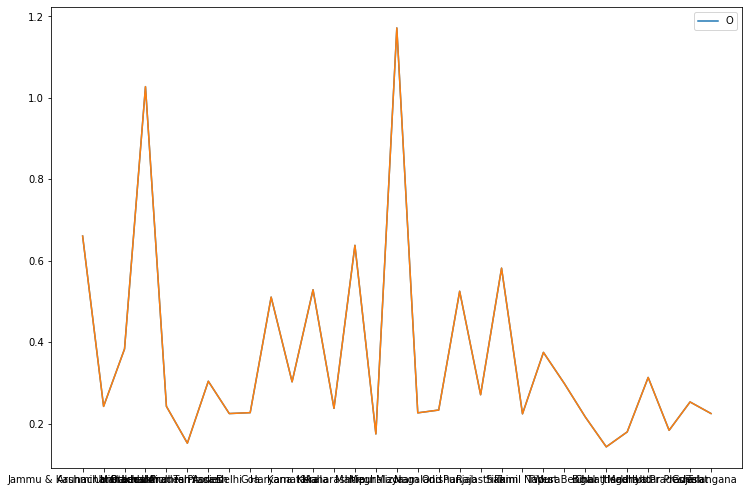

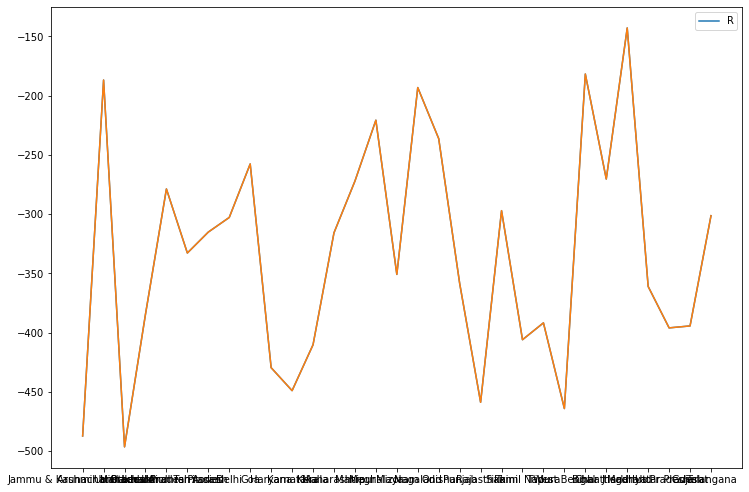

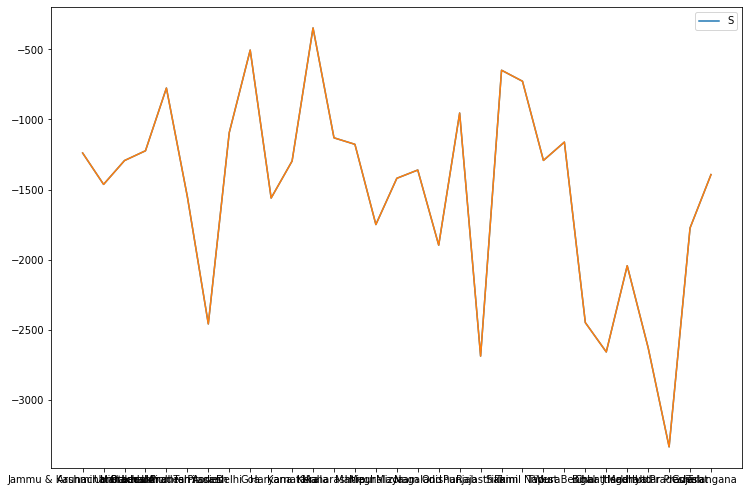

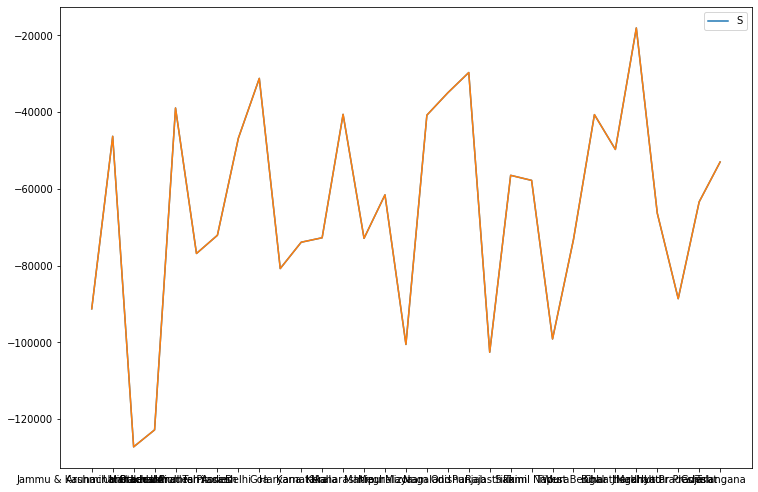

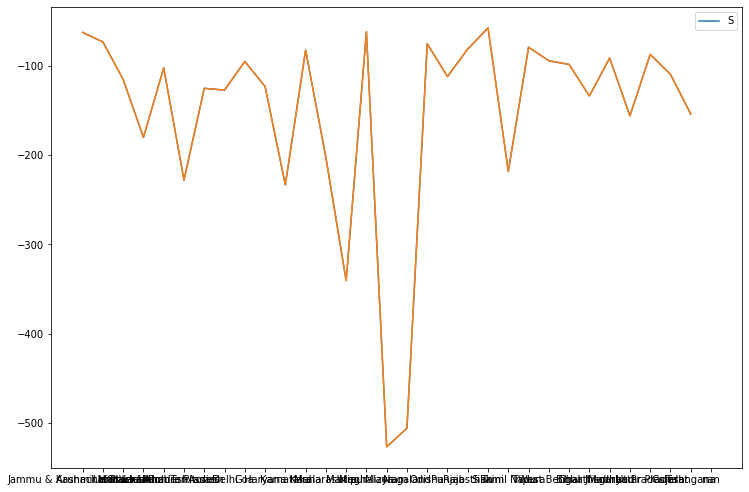

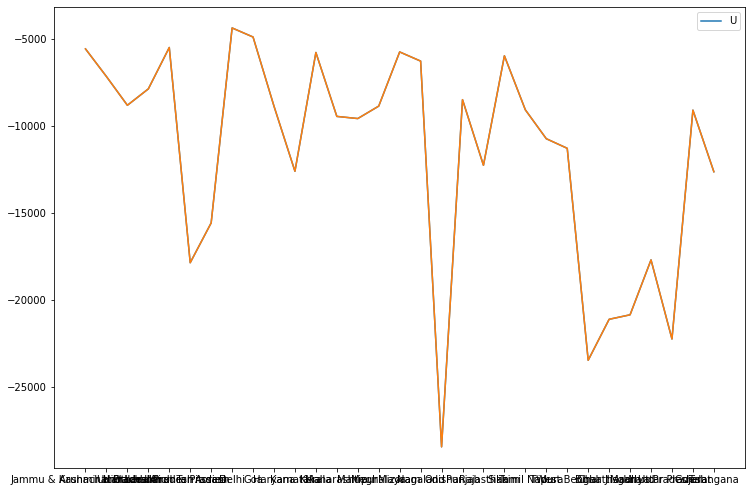

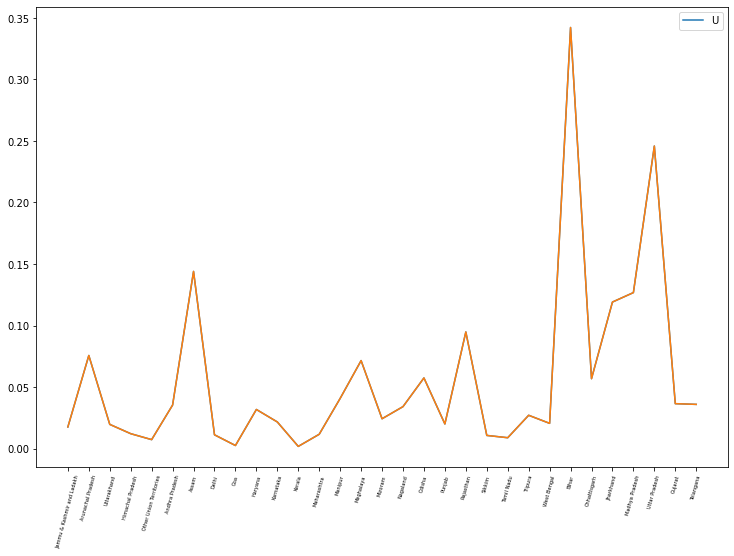

In [67]:
CSV_FILES = get_all_csv(DISEASE_RISK_PATH)
csv_file = []
for f in CSV_FILES:
    csv_file.append(f)
print(csv_file)
for i in range(len(csv_file)):
    x = pd.read_csv(csv_file[i])
    df = pd.DataFrame(x)
    variance = df.var()['Value']
    Variance = df['Value'] - variance *df['Value']
    df['Variance'] = Variance
    splitf = csv_file[i-1].split('\\')
    fig = plt.figure()
    myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
    myaxes.plot(df['Location'].tolist(), df['Variance'].tolist())
    plt.legend(splitf[-1].split('.')[0])
    plt.plot(df['Location'].tolist(), df['Variance'].tolist())
#plt.autoscale()
plt.xticks(rotation=75, fontsize=5) 
#plt.xscale(3)
plt.show()
